<a href="https://colab.research.google.com/github/HamzaGbada/ML-Examples/blob/main/Financial_Inclusion_in_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

### Read files

In [ ]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

print(train_data.head())
print(train_data.info())

  country  year  ...                  education_level                   job_type
0   Kenya  2018  ...              Secondary education              Self employed
1   Kenya  2018  ...              No formal education       Government Dependent
2   Kenya  2018  ...  Vocational/Specialised training              Self employed
3   Kenya  2018  ...                Primary education  Formally employed Private
4   Kenya  2018  ...                Primary education        Informally employed

[5 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_acc

#Check for missing values

In [ ]:
print('missing values:', train_data.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


# Plot target distribution


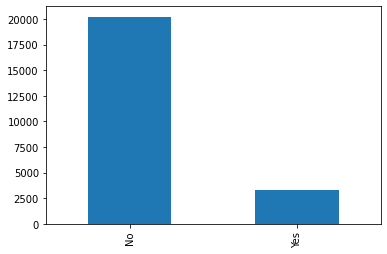

In [ ]:
train_data.bank_account.value_counts().plot(kind='bar')

# Convert target label to numerical Data

In [ ]:
le = LabelEncoder()
train_data['bank_account'] = le.fit_transform(train_data['bank_account'])
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


# Data visualisation 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

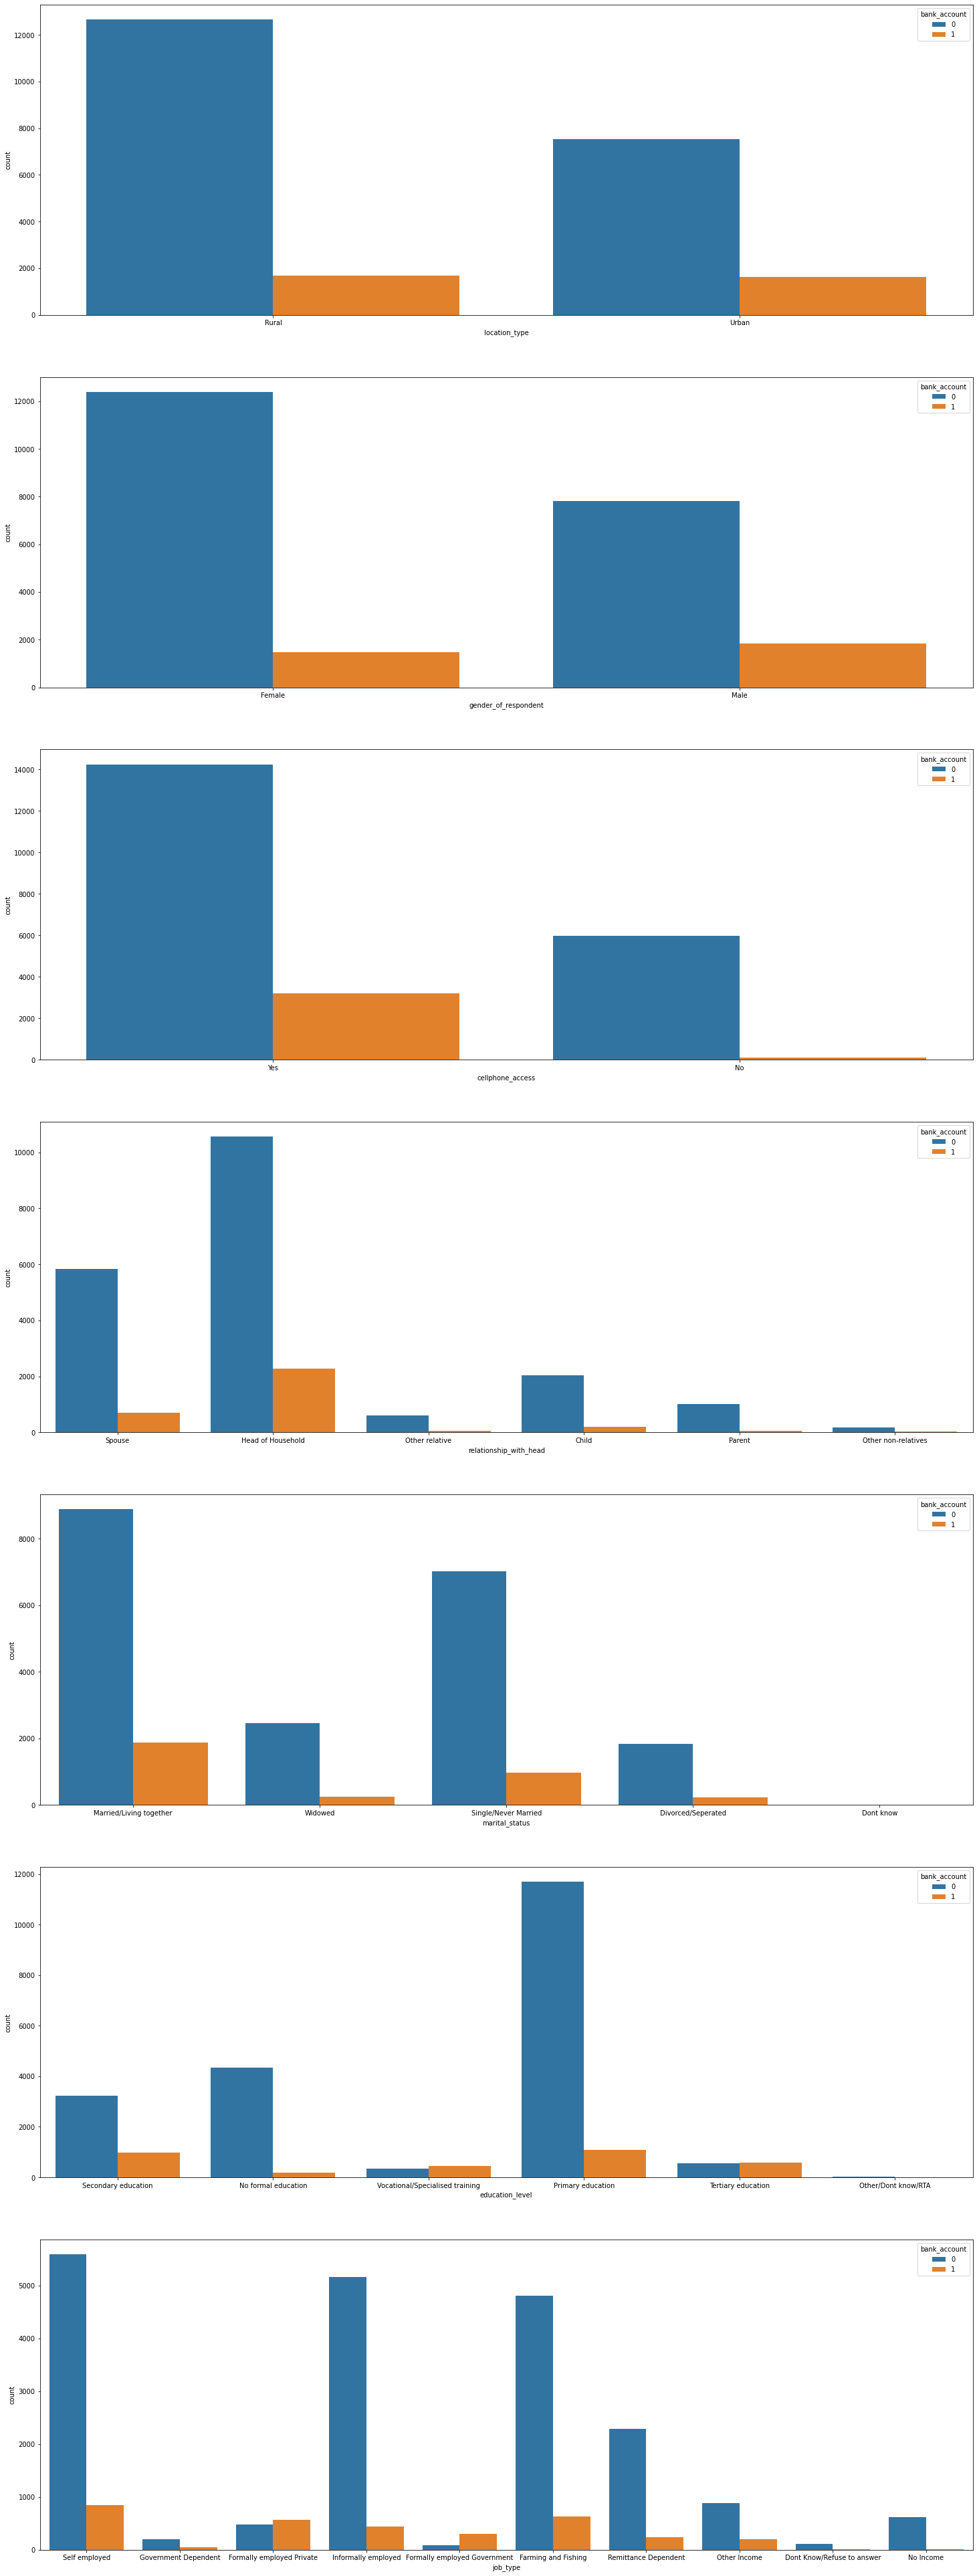

In [ ]:
f, axes = plt.subplots(7, 1, figsize=[25, 70])

sns.countplot('location_type', hue= 'bank_account', data=train_data, ax=axes[0])
sns.countplot('gender_of_respondent', hue= 'bank_account', data=train_data, ax=axes[1])
sns.countplot('cellphone_access', hue= 'bank_account', data=train_data, ax=axes[2])
sns.countplot('relationship_with_head', hue= 'bank_account', data=train_data, ax=axes[3])
sns.countplot('marital_status', hue= 'bank_account', data=train_data, ax=axes[4])
sns.countplot('education_level', hue= 'bank_account', data=train_data, ax=axes[5])
sns.countplot('job_type', hue= 'bank_account', data=train_data, ax=axes[6])

# Data preprocessing 
## Convert the some numerical labels from integer to float

In [ ]:
train_data['year_'] = train_data['year']
test_data['year_'] = test_data['year']

In [ ]:
float_array = train_data[['household_size', 'age_of_respondent', 'year_']].values.astype(float)
float_array = test_data[['household_size', 'age_of_respondent', 'year_']].values.astype(float)

## Convert categorical features to numerical features

In [ ]:
train_data['country_'] = train_data['country']
test_data['country_'] = test_data['country']

categ = ['relationship_with_head', 'marital_status', 'education_level', 'job_type', 'country_']
# One Hot Encoding conversion
train_data = pd.get_dummies(train_data, prefix_sep='_', columns = categ)

test_data = pd.get_dummies(test_data, prefix_sep='_', columns = categ)

## Labelncoder conversion

In [ ]:
train_data['location_type'] = le.fit_transform(train_data['location_type'])
train_data['cellphone_access'] = le.fit_transform(train_data['cellphone_access'])
train_data['gender_of_respondent'] = le.fit_transform(train_data['gender_of_respondent'])

test_data['location_type'] = le.fit_transform(test_data['location_type'])
test_data['cellphone_access'] = le.fit_transform(test_data['cellphone_access'])
test_data['gender_of_respondent'] = le.fit_transform(test_data['gender_of_respondent'])

In [ ]:
train_data.head()

In [ ]:
test_data.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_6056,1,1,3,30,1,2018,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,Kenya,2018,uniqueid_6060,1,1,7,51,1,2018,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,Kenya,2018,uniqueid_6065,0,0,3,77,0,2018,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,Kenya,2018,uniqueid_6072,0,0,6,39,0,2018,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,Kenya,2018,uniqueid_6073,1,0,3,16,1,2018,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


#Separate training features from target

In [ ]:
X_train = train_data.drop(['year', 'uniqueid', 'bank_account', 'country'], axis=1)
y_train = train_data['bank_account']
X_test = test_data.drop(['year', 'uniqueid', 'country'], axis=1)

#Rescale X_train and X_test




In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_rescaled = scaler.fit_transform(X_train)
X_test_rescaled = scaler.fit_transform(X_test)

In [ ]:
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,2018,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,2018,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,2018,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,2018,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,2018,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
X_train_rescaled.shape

(23524, 37)

# Feature selection

In [ ]:
model_selection = SelectKBest(score_func=f_classif, k=6)
fit = model_selection.fit(X_train_rescaled, y_train)
X_train_final = fit.transform(X_train_rescaled)
X_test_final = fit.transform(X_test_rescaled)
print("train data shape", X_train_final.shape)
print("test data shape", X_test_final.shape)

train data shape (23524, 6)
test data shape (10086, 6)


# Split train_data

In [ ]:
from sklearn.model_selection import train_test_split

X_Train, X_val, y_Train, y_val = train_test_split(X_train_final, y_train, stratify = y_train, test_size = 0.2, random_state=42)

# Model training and evaluation

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

k = 5
kf = KFold(n_splits=k, random_state=None)
model = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 500)

acc_score = []
print(y_train.shape)
for train_index , test_index in kf.split(X_train_rescaled):
    X_train_kf , X_test_kf = X_train_final[train_index,:],X_train_final[test_index,:]
    y_train_kf , y_test_kf = y_train[train_index] , y_train[test_index]
     
    model.fit(X_train_kf,y_train_kf)
    pred_values = model.predict(X_test_kf)
     
    acc = accuracy_score(pred_values , y_test_kf)
    acc_score.append(acc)

avg_acc_score = sum(acc_score)/k
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

(23524,)
accuracy of each fold - [0.7919234856535601, 0.8656748140276301, 0.8913921360255048, 0.9283740701381509, 0.9266581632653061]
Avg accuracy : 0.8808045338220303


# Get the predicted result for the test Data

In [ ]:
test_data.bank_account = model.predict(X_test_final)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


# Create submission DataFrame


In [ ]:
submission_df3 = pd.DataFrame({"uniqueid": test_data["uniqueid"] + " x " + test_data["country"],

"bank_account": test_data.bank_account})

In [ ]:
submission_df3.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [ ]:
submission_df3.to_csv('submission.csv', index = False)